In [1]:
    import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from Model import *
from data_transform import *
from plotters import *

ModuleNotFoundError: No module named 'data_transform'

In [2]:
data = pd.read_csv('./data/dane.data', delimiter='\t', header=None)
col_map = {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'y'}
data.rename(columns=col_map, inplace=True)
features = data.drop(columns='y').columns
data['const'] = 1
y_mean = data['y'].mean()
y_std = data['y'].std()

def rev_y(y):
    return y * y_std + y_mean

def true_mse(mse):
    return mse * y_std**2

data.head()

,a,b,c,d,e,f,y,const
0,13,30,2,-9,4,-2,235.53,1
1,13,55,2,-4,-2,-4,330.16,1
2,13,57,2,0,-2,-1,355.29,1
3,13,57,2,6,1,9,190.74,1
4,13,44,2,8,-5,-6,567.06,1


In [3]:
raw_test_data, raw_valid_data, raw_train_data = divide_data(data, 0.6, 0.2)

rtd_x, rtd_y = divide_y(raw_train_data)
rvd_x, rvd_y = divide_y(raw_valid_data)
rtest_x, rtest_y = divide_y(raw_test_data)

raw_model = LinearModel(7, 1, loss_f=MSE())
raw_model.fit_analytical(rtd_x, rtd_y)
raw_model.summary(rvd_x, rvd_y)

Weights: [-8.02597390e+00 -8.03911562e-01 -9.68826715e+00 -5.09824412e+00
 -2.86195518e+00 -2.43955071e+00  8.19197501e+02]
Loss: 138107.6539642351


In [4]:
normalized_data = add_normalized_features(data, True)
normalized_data['y']-=y_mean
normalized_data['y']/=y_std

norm_train_data, norm_valid_data, norm_test_data = divide_data(normalized_data, 0.6, 0.2)

ntd_x, ntd_y = divide_y(norm_train_data)
nvd_x, nvd_y = divide_y(norm_valid_data)
ntest_x, ntest_y = divide_y(norm_test_data)

norm_model = LinearModel(7, 1, loss_f=MSE())
norm_model.fit_analytical(ntd_x, ntd_y)
norm_model.summary(nvd_x, nvd_y)

print(true_mse(norm_model.evaluate(nvd_x, nvd_y)))

added 6 features
Weights: [-0.00465716 -0.26127783  0.02798856 -0.05502066  0.01269377 -0.09030732
 -0.10130541]
Loss: 0.9624832711377652
136752.6437481561


In [5]:
poly_data = add_polynomial_features(data, 5)
norm_data = add_normalized_features(poly_data, True)

norm_data['y'] = (norm_data['y'] - y_mean) / y_std

def sigmoid(x):
    return 1 / (1+np.exp(-x))
transforms = [(np.sin, 'sin'), (np.cos, 'cos'), (sigmoid, 'sigmoid')]
transformed_data = add_transform_features(norm_data, transforms)
n_features = len(transformed_data.drop(columns='y').columns)
print(f"Number of features: {n_features}")

added 21 features
added 461 features
added 1383 features
Number of features: 1845


In [94]:
train_data, val_data, test_data = divide_data(transformed_data, 0.6, 0.2)

td_x, td_y = divide_y(train_data)
vd_x, vd_y = divide_y(val_data)
test_x, test_y = divide_y(test_data)

train loss: 995.7102090932935
validation loss: 5582.578866804414
[('c_c_c_c_norm', 959655056700.5374), ('c_c_c_norm', -917561647676.0052), ('c_c_c_c_c_norm', -335144258407.287), ('c_norm', 163315028331.7655), ('cos_c_norm', -102047153720.09798), ('c_c_norm', 97757868806.39973), ('sin_c_norm', 91485501885.29883), ('cos_e_norm', 76440031989.65282), ('sin_c_c_c_c_norm', -53186644790.52331), ('sin_c_c_c_c_c_norm', 49346878560.5993)]


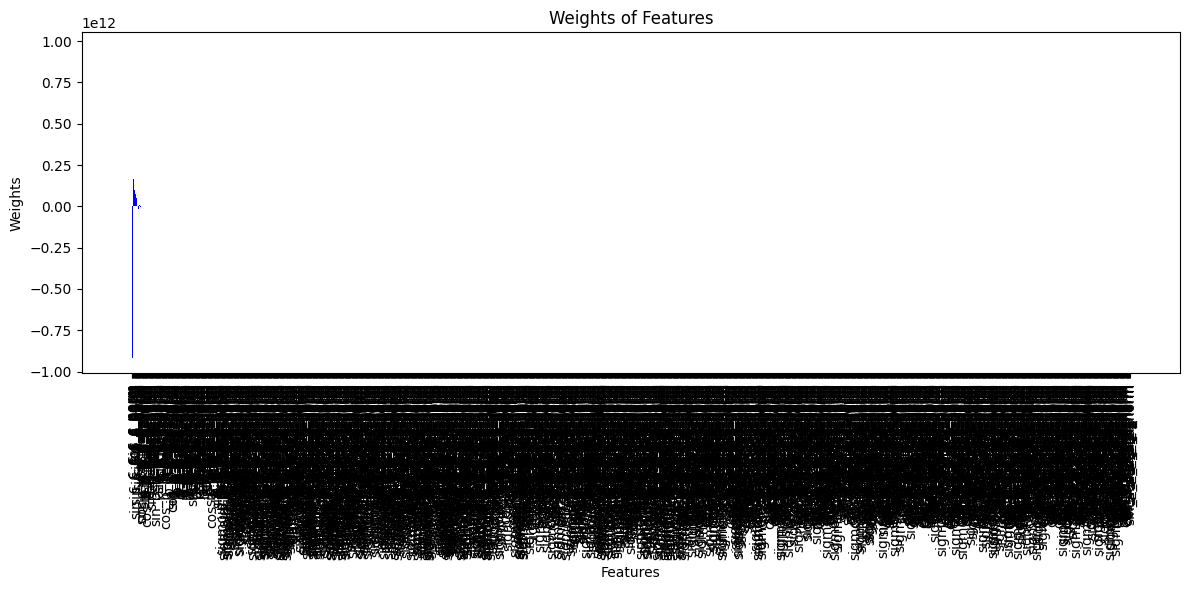

[('c_c_c_c_norm', 959655056700.5374),
 ('c_c_c_norm', -917561647676.0052),
 ('c_c_c_c_c_norm', -335144258407.287),
 ('c_norm', 163315028331.7655),
 ('cos_c_norm', -102047153720.09798),
 ('c_c_norm', 97757868806.39973),
 ('sin_c_norm', 91485501885.29883),
 ('cos_e_norm', 76440031989.65282),
 ('sin_c_c_c_c_norm', -53186644790.52331),
 ('sin_c_c_c_c_c_norm', 49346878560.5993),
 ('e_e_norm', 36464856194.67693),
 ('sin_c_c_norm', -30320529719.93956),
 ('sin_c_c_c_norm', -14055451074.1453),
 ('const', 12090209808.97095),
 ('e_norm', 10996289188.851686),
 ('e_e_e_e_norm', -8200017072.061924),
 ('e_e_e_norm', -3632217388.6475534),
 ('sin_e_norm', 2624207864.563527),
 ('sin_e_e_norm', -597912680.9656196),
 ('cos_c_c_c_c_c_norm', -429015344.6217822),
 ('sin_e_e_e_e_e_norm', 300683651.6404146),
 ('b_b_b_norm', -241869609.6998859),
 ('b_b_b_b_norm', 232357172.55529717),
 ('sin_e_e_e_e_norm', 190333869.55275044),
 ('sin_e_e_e_norm', -177968117.43631548),
 ('e_e_e_e_e_norm', 163320530.5645869),
 ('b

In [7]:
model = LinearModel(n_features, 1, loss_f=MSE())
model.fit_analytical(td_x, td_y)
# model.summary(vd_x, vd_y)
print(f"train loss: {model.evaluate(td_x, td_y)}")
print(f"validation loss: {model.evaluate(vd_x, vd_y)}")
plot_feature_importance(model, train_data)

In [22]:
alphas = np.arange(1e-4, 0.005, 1e-3)
alphas = np.concatenate((alphas, np.arange(0.005, 0.1, 0.005)))
alphas = np.concatenate((alphas, np.arange(0.1, 1, 0.05)))
train_losses = []
val_losses = []

criterion = MSE()

best_alpha = None
best_loss = np.inf
best_L2_model = None

for alpha in alphas:
    model = LinearModel(n_features, 1, loss_f=L2(MSE(), alpha))
    model.fit_analytical(td_x, td_y)
    tr_loss = model.evaluate(td_x, td_y)
    val_crit = criterion.forward(model.forward(vd_x), vd_y, model.weights)
    train_losses.append(tr_loss)
    val_losses.append(val_crit)
    if val_crit < best_loss:
        best_alpha = alpha
        best_loss = val_crit
        best_L2_model = model
        print(f"alpha: {alpha}, train loss: {tr_loss}, val loss: {val_crit}")
    # print(f"alpha: {alpha}, train loss: {tr_loss}, val loss: {val_crit}")
    

alpha: 0.0001, train loss: 1.0096808281479057, val loss: 1.4283772295527695
alpha: 0.0011, train loss: 4.54879418405093, val loss: 0.7248632737265842
alpha: 0.0021, train loss: 6.6818925442466375, val loss: 0.6807305358135656
alpha: 0.0031, train loss: 8.39556829973706, val loss: 0.6631074853887694
alpha: 0.0041, train loss: 9.876961783939919, val loss: 0.651358879891331
alpha: 0.005, train loss: 11.07541582432061, val loss: 0.6429570664859483
alpha: 0.01, train loss: 16.379565117082254, val loss: 0.6122034378685522
alpha: 0.015, train loss: 20.364080046987176, val loss: 0.5928263875801768
alpha: 0.02, train loss: 23.569675753769275, val loss: 0.5777690857552327
alpha: 0.025, train loss: 26.236791755000315, val loss: 0.5649504646214076
alpha: 0.030000000000000002, train loss: 28.504286074594614, val loss: 0.5536144167214568
alpha: 0.034999999999999996, train loss: 30.462593989294625, val loss: 0.5434256781953812
alpha: 0.04, train loss: 32.17481393054283, val loss: 0.5342004398176237
a

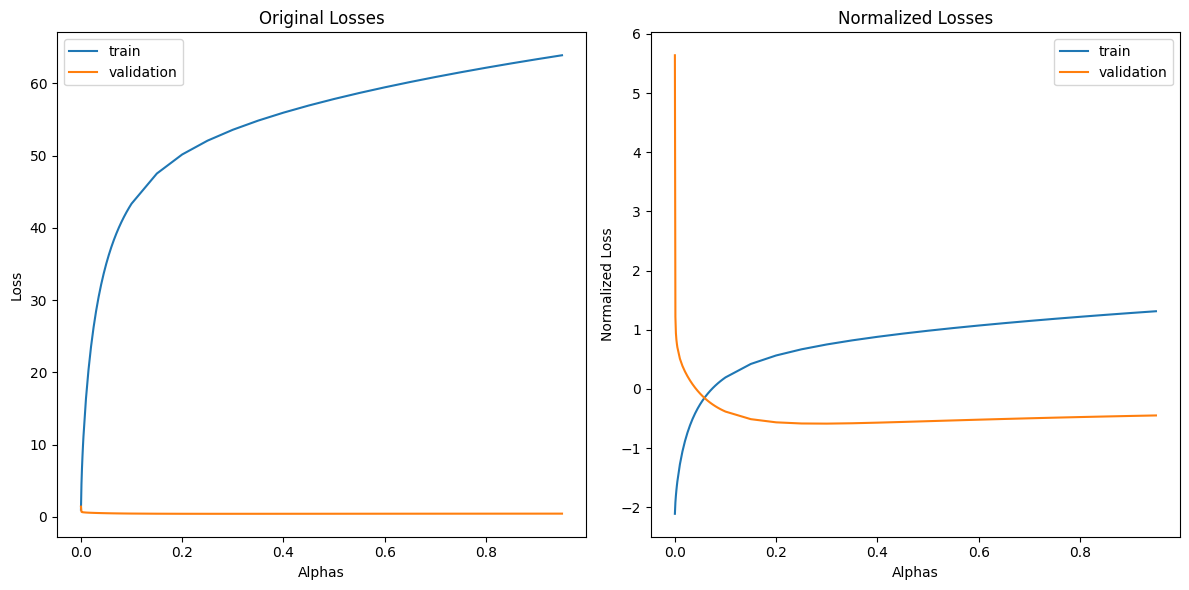

In [23]:
plot_losses(train_losses, val_losses, alphas)

In [24]:
mse = criterion.forward(best_L2_model.forward(vd_x), vd_y, best_L2_model.weights)
print(f"Best alpha: {best_alpha}, val loss: {mse}")

Best alpha: 0.30000000000000004, val loss: 0.4376270834281317


In [12]:
alphas = np.arange(1e-4, 0.005, 1e-4)
alphas = np.concatenate((alphas, np.arange(0.005, 0.1, 0.005)))
alphas = np.concatenate((alphas, np.arange(0.1, 1, 0.05)))
train_losses = []
val_losses = []

criterion = MSE()

best_alpha = None
best_loss = np.inf
best_L1_model = None

for alpha in alphas:
    model = LinearModel(n_features, 1, loss_f=L1(MSE(), alpha))
    model.fit_gradient_descent(td_x, td_y, vd_x, vd_y, lr=1e-4, epochs=5000, optim=False, verbose=False, batch_size=256, min_improvement=1e-4)
    tr_loss = model.evaluate(td_x, td_y)
    val_crit = criterion.forward(model.forward(vd_x), vd_y, model.weights)
    train_losses.append(tr_loss)
    val_losses.append(val_crit)
    if val_crit < best_loss:
        best_alpha = alpha
        best_loss = val_crit
        best_L1_model = model
        print(f"alpha: {alpha}, train loss: {tr_loss}, val loss: {val_crit}")
    # print(f"alpha: {alpha}, train loss: {tr_loss}, val loss: {val_crit}")
    


alpha: 0.0001, train loss: 0.8843474669499889, val loss: 0.9526970346089518
alpha: 0.0006000000000000001, train loss: 0.8811023600511165, val loss: 0.9467278426415853


In [14]:
print(len(alphas))

86


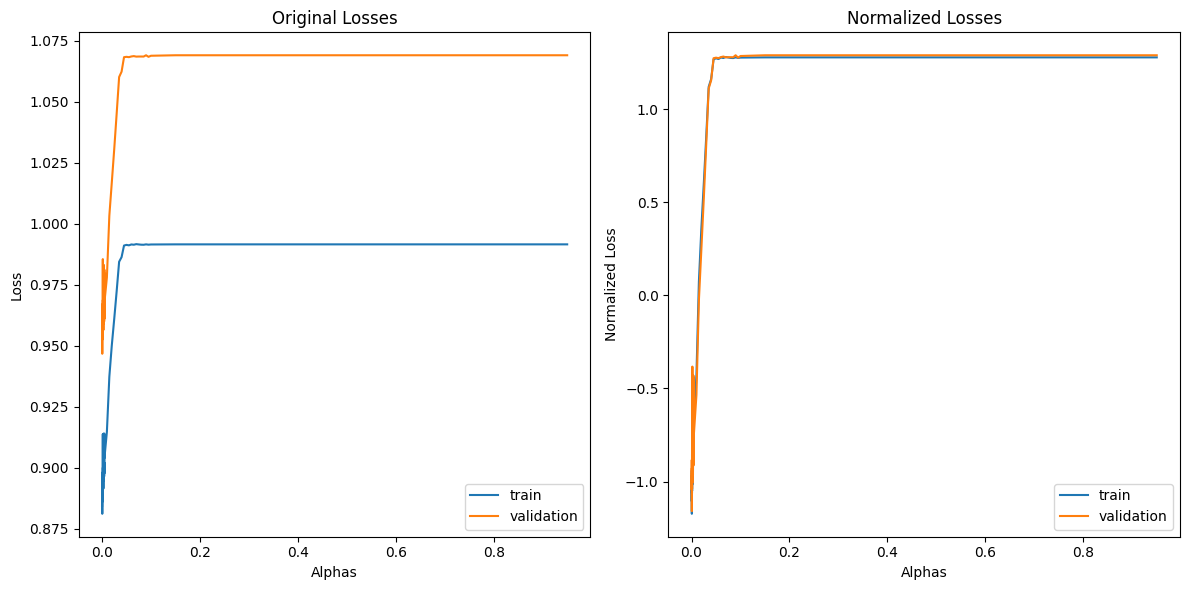

In [13]:
plot_losses(train_losses, val_losses, alphas)

In [30]:
alphas = np.arange(1e-4, 0.005, 1e-4)
alphas = np.concatenate((alphas, np.arange(0.005, 0.1, 0.005)))
alphas = np.concatenate((alphas, np.arange(0.1, 1, 0.05)))

train_losses = []
val_losses = []

criterion = MSE()

best_alpha = None
best_loss = np.inf
best_L1_model = None

for alpha in alphas:
    model = LinearModel(n_features, 1, loss_f=L1(MSE(), alpha))
    model.fit_gradient_descent(td_x, td_y, vd_x, vd_y, lr=1e-4, epochs=5000, optim=True, verbose=False, batch_size=256, min_improvement=1e-4)
    tr_loss = model.evaluate(td_x, td_y)
    val_crit = criterion.forward(model.forward(vd_x), vd_y, model.weights)
    train_losses.append(tr_loss)
    val_losses.append(val_crit)
    if val_crit < best_loss:
        best_alpha = alpha
        best_loss = val_crit
        best_L1_model = model
        print(f"alpha: {alpha}, train loss: {tr_loss}, val loss: {val_crit}")
    print(f"alpha: {alpha}, train loss: {tr_loss}, val loss: {val_crit}")
    

alpha: 0.0001, train loss: 0.7254440999428986, val loss: 0.814776599515948
alpha: 0.0001, train loss: 0.7254440999428986, val loss: 0.814776599515948
alpha: 0.0002, train loss: 0.6093612893787631, val loss: 0.7517466950419167
alpha: 0.0002, train loss: 0.6093612893787631, val loss: 0.7517466950419167
alpha: 0.00030000000000000003, train loss: 0.7938438092071799, val loss: 0.8468495153162354
alpha: 0.0004, train loss: 0.551787337167192, val loss: 0.7040296282444232
alpha: 0.0004, train loss: 0.551787337167192, val loss: 0.7040296282444232
alpha: 0.0005, train loss: 0.8224283632545927, val loss: 0.8875236072389453
alpha: 0.0006000000000000001, train loss: 0.6554810361816781, val loss: 0.7687289098276507
alpha: 0.0007000000000000001, train loss: 0.6798027323523481, val loss: 0.7592770839383957
alpha: 0.0008, train loss: 0.6319752990516693, val loss: 0.7506993917783414
alpha: 0.0009000000000000001, train loss: 0.7175332808715308, val loss: 0.8109691158752378
alpha: 0.001, train loss: 0.692

In [31]:
print(len(alphas))

86


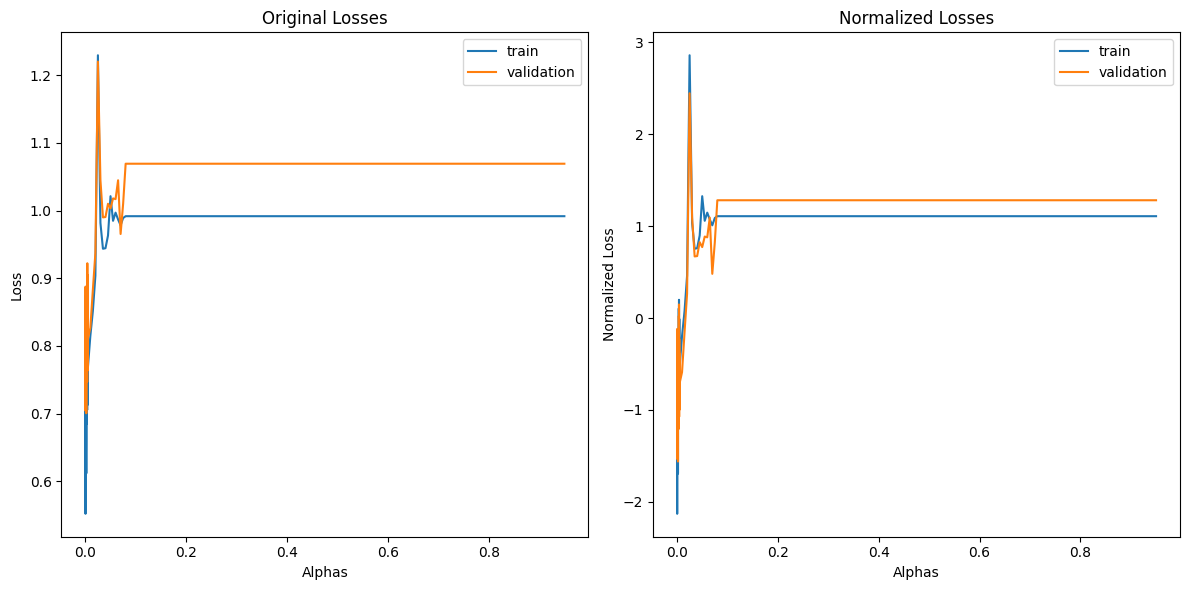

In [32]:
plot_losses(train_losses, val_losses, alphas)

In [33]:
mse = criterion.forward(best_L1_model.forward(vd_x), vd_y, best_L1_model.weights)
print(f"Best alpha: {best_alpha}, val loss: {mse}")

Best alpha: 0.002, val loss: 0.7003668649090917


[('sin_a_a_norm', 3.6196562504764143), ('cos_a_norm', -3.383311666624218), ('sin_a_norm', -3.345905568589535), ('sin_a_a_a_a_a_norm', -3.0070975748153583), ('cos_a_a_a_norm', 2.670707340773846), ('cos_a_a_a_a_norm', 2.5785100194362744), ('sin_a_b_norm', -2.4909256464627734), ('sin_a_a_b_norm', 1.923450847596597), ('sin_a_a_a_norm', 1.908976893674576), ('sin_a_a_a_a_b_norm', -1.7160421212636094)]


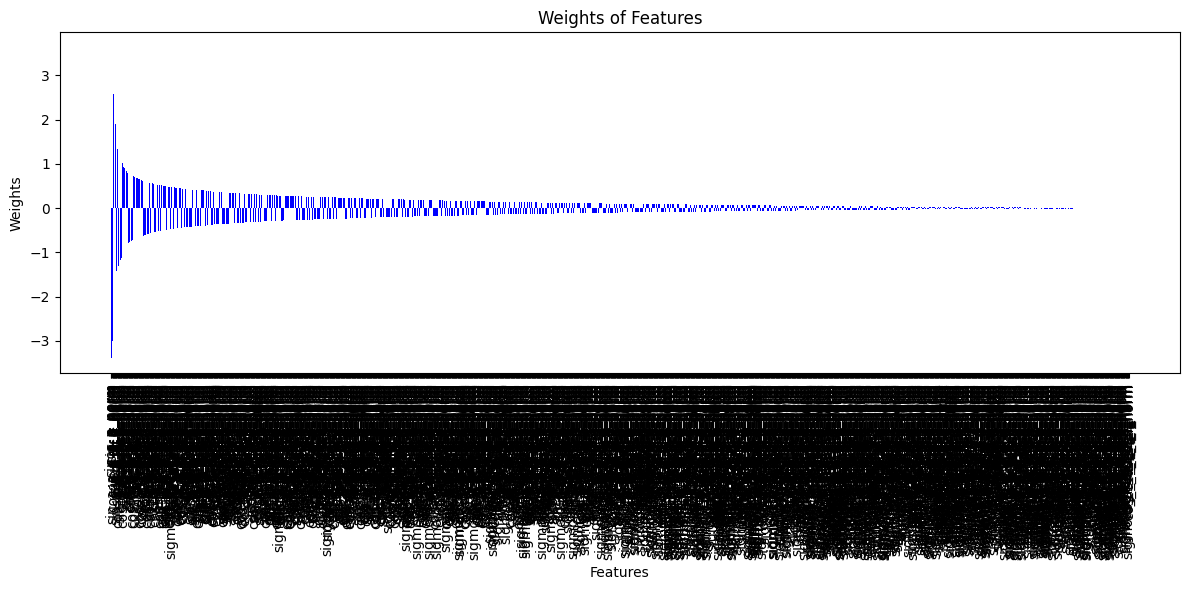

[('sin_a_a_norm', 3.6196562504764143),
 ('cos_a_norm', -3.383311666624218),
 ('sin_a_norm', -3.345905568589535),
 ('sin_a_a_a_a_a_norm', -3.0070975748153583),
 ('cos_a_a_a_norm', 2.670707340773846),
 ('cos_a_a_a_a_norm', 2.5785100194362744),
 ('sin_a_b_norm', -2.4909256464627734),
 ('sin_a_a_b_norm', 1.923450847596597),
 ('sin_a_a_a_norm', 1.908976893674576),
 ('sin_a_a_a_a_b_norm', -1.7160421212636094),
 ('sin_f_f_f_norm', -1.4273795807674672),
 ('cos_a_a_c_norm', -1.405343896085692),
 ('sin_f_f_f_f_f_norm', 1.333733321271099),
 ('cos_a_a_b_norm', -1.3182978921218065),
 ('cos_a_a_a_a_a_norm', -1.311213825493616),
 ('sin_a_a_a_a_norm', -1.266566221300794),
 ('sin_a_c_norm', -1.1913839948514886),
 ('sin_a_a_a_a_c_norm', -1.182357857758845),
 ('f_f_f_norm', -1.1532477645115637),
 ('cos_a_a_norm', -1.1263845715673926),
 ('sin_a_a_c_norm', 1.0280998219105157),
 ('cos_a_a_a_b_norm', 1.0148923508094274),
 ('cos_a_b_b_norm', 1.0087999810525992),
 ('cos_a_a_a_b_b_norm', 0.9291499328418902),
 (

In [34]:
plot_feature_importance(best_L2_model, train_data)

[('cos_a_a_a_a_a_norm', 0.17725375873330737), ('cos_a_a_a_a_norm', 0.16059169536050835), ('cos_a_norm', -0.14007236891126298), ('cos_a_a_a_a_b_norm', 0.13924134692687493), ('sin_b_f_f_f_norm', -0.1119015146028189), ('sin_f_f_f_norm', -0.11009055895700623), ('cos_a_a_a_a_c_norm', 0.1049297556164862), ('sin_f_f_f_f_f_norm', -0.103877964578242), ('cos_a_b_norm', -0.10152295914479047), ('sin_b_b_f_f_f_norm', -0.10046086653162248)]


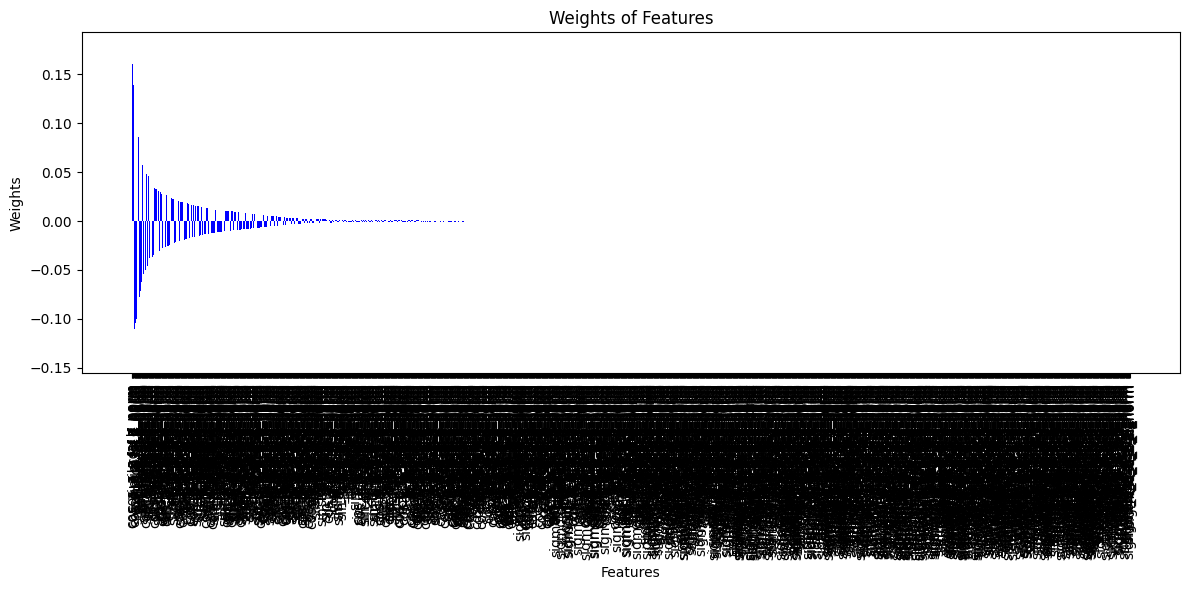

[('cos_a_a_a_a_a_norm', 0.17725375873330737),
 ('cos_a_a_a_a_norm', 0.16059169536050835),
 ('cos_a_norm', -0.14007236891126298),
 ('cos_a_a_a_a_b_norm', 0.13924134692687493),
 ('sin_b_f_f_f_norm', -0.1119015146028189),
 ('sin_f_f_f_norm', -0.11009055895700623),
 ('cos_a_a_a_a_c_norm', 0.1049297556164862),
 ('sin_f_f_f_f_f_norm', -0.103877964578242),
 ('cos_a_b_norm', -0.10152295914479047),
 ('sin_b_b_f_f_f_norm', -0.10046086653162248),
 ('cos_a_a_a_norm', 0.0930163388653453),
 ('sin_b_c_f_f_f_norm', -0.08932817353197696),
 ('sin_a_a_a_e_e_norm', 0.08583388420739153),
 ('sin_a_b_f_f_f_norm', -0.08060753354577854),
 ('a_norm', -0.0779293697255372),
 ('sin_c_f_f_f_norm', -0.0755192376849812),
 ('sin_a_f_f_f_norm', -0.07200678049228822),
 ('cos_a_a_a_b_norm', 0.06863709611834737),
 ('sin_c_c_f_f_f_norm', -0.06242807307527286),
 ('cos_a_c_norm', -0.05924194976304455),
 ('sin_a_a_norm', 0.05774568026723088),
 ('f_f_f_f_f_norm', 0.057600724365558374),
 ('sin_a_a_f_f_f_norm', -0.05380376723771

In [35]:
plot_feature_importance(best_L1_model, train_data)

In [95]:
def get_best_columns(data, target, model, n):
    # get n best columns that are most used in model
    x_data = data.drop(columns=target)
    y_data = data[target]
    features_weights = []
    for i, feature in enumerate(x_data.columns):
        weights = model.weights[i]
        features_weights.append((feature, abs(weights)))
        
    features_weights = sorted(features_weights, key=lambda x: x[1], reverse=True)
    return [x[0] for x in features_weights[:n]]

In [98]:

best_l1_features = get_best_columns(train_data, 'y', best_L1_model, 100)
best_l2_features = get_best_columns(train_data, 'y', best_L2_model, 100)

best_combined_features = list(set(best_l1_features) | set(best_l2_features))

print(f"Combined features: {len(best_combined_features)}")
n_chosen = len(best_combined_features)

Combined features: 174


In [99]:
cut_data = transformed_data[best_combined_features + ['y']]

cut_train_data, cut_val_data, cut_test_data = divide_data(cut_data, 0.6, 0.2)

ctd_x, ctd_y = divide_y(cut_train_data)
cvd_x, cvd_y = divide_y(cut_val_data)
ctest_x, ctest_y = divide_y(cut_test_data)

print(ctd_x.shape, ctd_y.shape)

(1199, 174) (1199,)


In [101]:
from itertools import product

def grid_search(alphas1, alphas2, func):
    best_alpha1 = None
    best_alpha2 = None
    best_loss = np.inf
    
    history = []
    
    for alpha1, alpha2 in product(alphas1, alphas2):
        act_loss = func(alpha1, alpha2)
        history.append((alpha1, alpha2, act_loss))
        print(f"alpha1: {alpha1}, alpha2: {alpha2}, loss: {act_loss}")
        if act_loss < best_loss:
            best_alpha1 = alpha1
            best_alpha2 = alpha2
            best_loss = act_loss
            # print(f"alpha1: {alpha1}, alpha2: {alpha2}, loss: {act_loss}")
            
    return best_alpha1, best_alpha2, best_loss, history

def get_loss(alpha1, alpha2):
    small_model = LinearModel(n_chosen, 1, loss_f=L1(L2(MSE(), alpha1), alpha2))
    small_model.fit_gradient_descent(ctd_x, ctd_y, cvd_x, cvd_y, lr=1e-4, epochs=4000, optim=True, verbose=False)
    return MSE().forward(small_model.forward(cvd_x), cvd_y, small_model.weights)


alpha1: 0.0, alpha2: 0.0, loss: 0.5794275146109695
alpha1: 0.0, alpha2: 0.002, loss: 0.5946066856105253
alpha1: 0.0, alpha2: 0.004, loss: 0.6213536549939014
alpha1: 0.0, alpha2: 0.006, loss: 0.6334703673652065
alpha1: 0.0, alpha2: 0.008, loss: 0.6703585769853838
alpha1: 0.0, alpha2: 0.01, loss: 0.69280314854714
alpha1: 0.0, alpha2: 0.012, loss: 0.7051774242398807
alpha1: 0.0, alpha2: 0.014, loss: 0.7091860218669381
alpha1: 0.0, alpha2: 0.016, loss: 0.7304037335737965
alpha1: 0.0, alpha2: 0.018000000000000002, loss: 0.7446387812831307
alpha1: 0.0, alpha2: 0.02, loss: 0.7448567443899887
alpha1: 0.0, alpha2: 0.022, loss: 0.7523092507735831
alpha1: 0.0, alpha2: 0.024, loss: 0.7649425723149057
alpha1: 0.0, alpha2: 0.026000000000000002, loss: 0.7764000722379829
alpha1: 0.0, alpha2: 0.028, loss: 0.7766218706325426
alpha1: 0.0, alpha2: 0.03, loss: 0.7915653174674031
alpha1: 0.0, alpha2: 0.032, loss: 0.7917648967157912
alpha1: 0.0, alpha2: 0.034, loss: 0.8123744743176193
alpha1: 0.0, alpha2: 0.

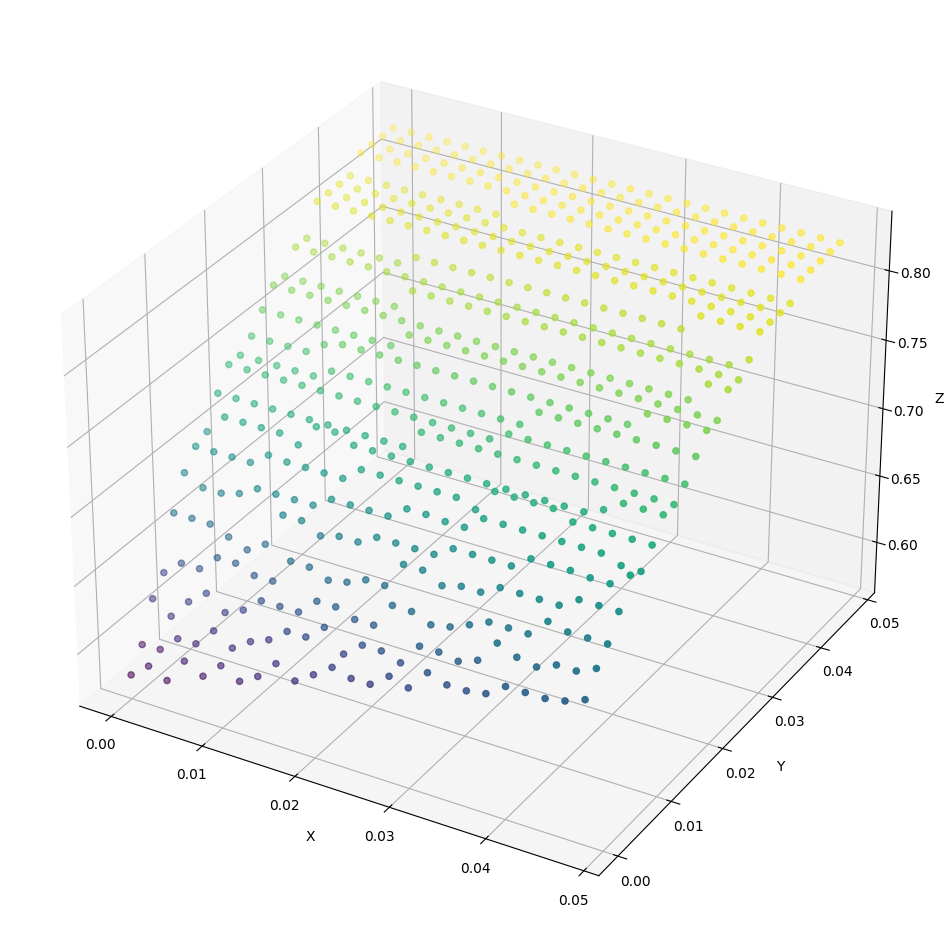

In [102]:
alphas1 = np.arange(0, 0.05, 2e-3)
alphas2 = np.arange(0, 0.05, 2e-3)

best_alpha1, best_alpha2, best_loss, history = grid_search(alphas1, alphas2, get_loss)

print(f"best alpha1: {best_alpha1}, best alpha2: {best_alpha2}, best loss: {best_loss}")
plot_heatmap(history)

In [117]:
best_L1_L2_model = LinearModel(n_chosen, 1, loss_f=L1(L2(MSE(), best_alpha1), best_alpha2))
best_L1_L2_model.fit_gradient_descent(ctd_x, ctd_y, cvd_x, cvd_y, lr=2e-5, epochs=100000, optim=False, verbose=True, min_improvement=1e-5)

mse = MSE().forward(best_L1_L2_model.forward(cvd_x), cvd_y, best_L1_L2_model.weights)
print(f"mse: {mse}")

Epoch 1/100000 Loss: 0.9906944983968191
Epoch 1/100000 Validation Loss: 1.0681047471028713
Epoch 101/100000 Loss: 0.9327092101013124
Epoch 101/100000 Validation Loss: 1.0002591946218427
Epoch 201/100000 Loss: 0.903875283319933
Epoch 201/100000 Validation Loss: 0.9657974532618923
Epoch 301/100000 Loss: 0.8850119770770791
Epoch 301/100000 Validation Loss: 0.9434683761346483
Epoch 401/100000 Loss: 0.8706395035796247
Epoch 401/100000 Validation Loss: 0.9268690090910385
Epoch 501/100000 Loss: 0.858757877356612
Epoch 501/100000 Validation Loss: 0.9135536776206595
Epoch 601/100000 Loss: 0.8484706038732728
Epoch 601/100000 Validation Loss: 0.902389868490421
Epoch 701/100000 Loss: 0.8393105235959534
Epoch 701/100000 Validation Loss: 0.8927711322084733
Epoch 801/100000 Loss: 0.8310047797293116
Epoch 801/100000 Validation Loss: 0.8843327033910365
Epoch 901/100000 Loss: 0.8233787528927466
Epoch 901/100000 Validation Loss: 0.8768333172711794
Epoch 1001/100000 Loss: 0.8163122757636196
Epoch 1001/100

In [130]:
no_reg_model = LinearModel(n_chosen, 1, loss_f=MSE())
no_reg_model.fit_analytical(ctd_x, ctd_y)
mse = MSE().forward(no_reg_model.forward(cvd_x), cvd_y, no_reg_model.weights)
print(f"mse: {mse}")

mse: 0.004030300983163624


In [120]:
alphas = np.arange(1e-4, 0.005, 1e-4)
alphas = np.concatenate((alphas, np.arange(0.005, 0.1, 0.005)))
alphas = np.concatenate((alphas, np.arange(0.1, 1, 0.05)))

train_losses = []
val_losses = []

criterion = MSE()

best_alpha = None
best_loss = np.inf
best_small_model = None

for alpha in alphas:
    model = LinearModel(n_chosen, 1, loss_f=L2(MSE(), alpha))
    model.fit_analytical(ctd_x, ctd_y)
    tr_loss = model.evaluate(ctd_x, ctd_y)
    val_crit = criterion.forward(model.forward(cvd_x), cvd_y, model.weights)
    train_losses.append(tr_loss)
    val_losses.append(val_crit)
    if val_crit < best_loss:
        best_alpha = alpha
        best_loss = val_crit
        best_small_model = model
        # print(f"alpha: {alpha}, train loss: {tr_loss}, val loss: {val_crit}")
    print(f"alpha: {alpha}, train loss: {tr_loss}, val loss: {val_crit}")
    

alpha: 0.0001, train loss: 2.860856779358758, val loss: 0.012077979829425932
alpha: 0.0002, train loss: 3.350665418385362, val loss: 0.014004231136153233
alpha: 0.00030000000000000003, train loss: 3.8575149971882374, val loss: 0.015186259039512689
alpha: 0.0004, train loss: 4.338687113492044, val loss: 0.016088289424775457
alpha: 0.0005, train loss: 4.797136400173086, val loss: 0.016836022490001875
alpha: 0.0006000000000000001, train loss: 5.237676173022246, val loss: 0.017483766442149416
alpha: 0.0007000000000000001, train loss: 5.663673008016028, val loss: 0.018060992051665895
alpha: 0.0008, train loss: 6.077320386507982, val loss: 0.01858584007726494
alpha: 0.0009000000000000001, train loss: 6.480078098893251, val loss: 0.01907037462386028
alpha: 0.001, train loss: 6.87296438716636, val loss: 0.01952304537909179
alpha: 0.0011, train loss: 7.256729538298193, val loss: 0.019949994926209306
alpha: 0.0012000000000000001, train loss: 7.631957231165652, val loss: 0.020355816742592365
alph

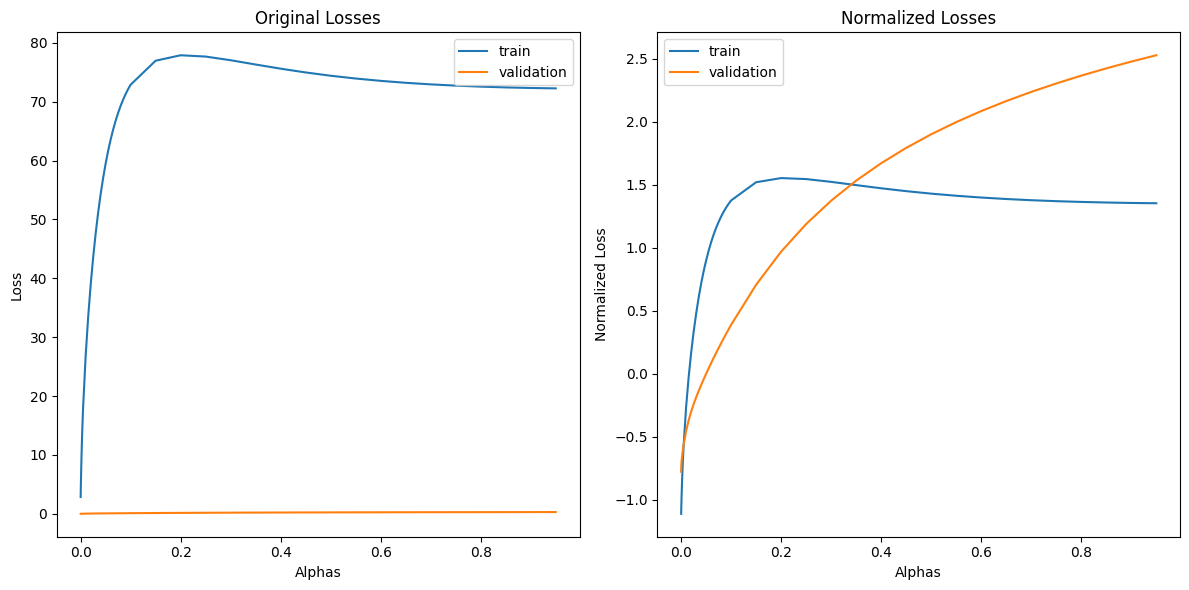

In [121]:
plot_losses(train_losses, val_losses, alphas)

Current number of features: 1
Current number of features: 2
Current number of features: 3
Current number of features: 4
Current number of features: 5
Current number of features: 6
Current number of features: 7
Current number of features: 8
Current number of features: 9
Current number of features: 10
Current number of features: 11
Current number of features: 12
Current number of features: 13
Current number of features: 14
Current number of features: 15
Current number of features: 16
Current number of features: 17
Current number of features: 18
Current number of features: 19
Current number of features: 20
Current number of features: 21
Current number of features: 22
Current number of features: 23
Current number of features: 24
Current number of features: 25
Current number of features: 26
Current number of features: 27
Current number of features: 28
Current number of features: 29
Current number of features: 30
Current number of features: 31
Current number of features: 32
Current number of

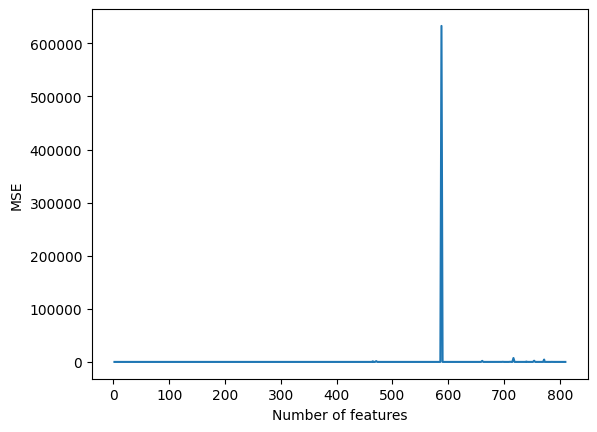

In [124]:
max_features = 500
feature_score = []
for curr_nf in range(1, max_features):
    print(f"Current number of features: {curr_nf}")
    best_l1_features = get_best_columns(train_data, 'y', best_L1_model, curr_nf)
    best_l2_features = get_best_columns(train_data, 'y', best_L2_model, curr_nf)
    
    best_combined_features = list(set(best_l1_features) | set(best_l2_features))
    
    curr_cut_data = transformed_data[best_combined_features + ['y']]
    
    curr_cut_train_data, curr_cut_val_data, curr_cut_test_data = divide_data(curr_cut_data, 0.6, 0.2)
    
    cctd_x, cctd_y = divide_y(curr_cut_train_data)
    ccvd_x, ccvd_y = divide_y(curr_cut_val_data)
    cctest_x, cctest_y = divide_y(curr_cut_test_data)
    
    curr_model = LinearModel(curr_nf, 1, loss_f=MSE())
    
    curr_model.fit_analytical(cctd_x, cctd_y)
    feature_score.append((len(best_combined_features), curr_model.evaluate(ccvd_x, ccvd_y)))



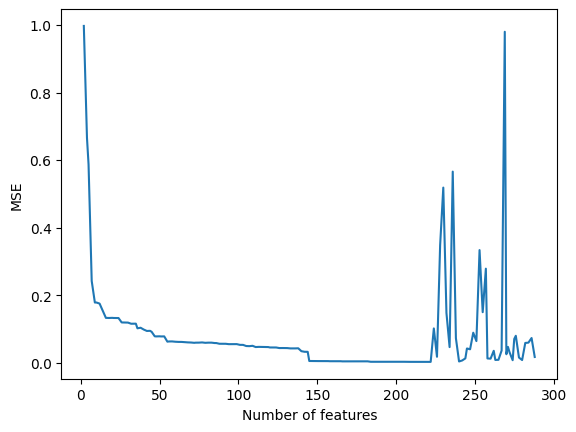

In [126]:

# plot feature score
plt.plot([x[0] for x in feature_score[:170]], [x[1] for x in feature_score[:170]])
plt.xlabel('Number of features')
plt.ylabel('MSE')
plt.show()
    

In [137]:
def get_learning_curve(model, td_x, td_y, test_x, test_y, num_runs=10):
    res = []
    for frac in np.arange(0.01, 1, 0.01):
        mse_sum = 0
        for _ in range(num_runs):
            model.fit_analytical(td_x[:int(frac*len(td_x))], td_y[:int(frac*len(td_y))])
            mse_sum += model.evaluate(test_x, test_y)
        avg_mse = mse_sum / num_runs
        res.append((frac, avg_mse))
    return res


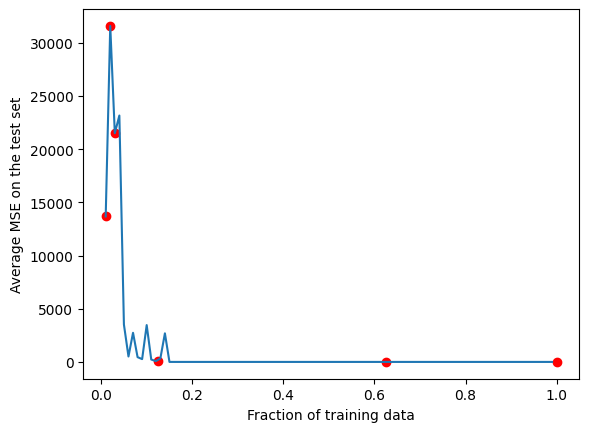

In [138]:

champion_model = LinearModel(n_chosen, 1, loss_f=MSE())

learning_curve = get_learning_curve(champion_model, ctd_x, ctd_y, ctest_x, ctest_y)

plt.plot([x[0] for x in learning_curve], [x[1] for x in learning_curve])
for frac in [0.01, 0.02, 0.03, 0.125, 0.625, 1]:
    champion_model.fit_analytical(ctd_x[:int(frac*len(ctd_x))], ctd_y[:int(frac*len(ctd_y))])
    mse = champion_model.evaluate(ctest_x, ctest_y)
    plt.scatter(frac, mse, color='red')

plt.xlabel('Fraction of training data')
plt.ylabel('Average MSE on the test set')
plt.show()

In [145]:
champion_model.fit_analytical(ctd_x, ctd_y)
mse = champion_model.evaluate(ctd_x, ctd_y)
print(f"mse on training set: {mse}, absolute mse: {true_mse(mse)}")
mse = champion_model.evaluate(cvd_x, cvd_y)
print(f"mse on validation set: {mse} absolute mse: {true_mse(mse)}")
mse = champion_model.evaluate(ctest_x, ctest_y)
print(f"mse on test set: {mse} absolute mse: {true_mse(mse)}")


def real_y(y):
    return y * y_std + y_mean

n_predictions = 10
predictions = champion_model.forward(ctest_x[:n_predictions])
for i in range(n_predictions):
    predicted = "{:.3f}".format(real_y(predictions[i]))
    real = "{:.3f}".format(real_y(ctest_y[i]))
    print(f"predicted: {predicted}, real: {real}")

mse on training set: 0.0017648385478251291, absolute mse: 250.75379951117907
mse on validation set: 0.004030300983163624 absolute mse: 572.6378120805059
mse on test set: 0.0030048208801226263 absolute mse: 426.9343807510329
predicted: 889.323, real: 905.990
predicted: 989.007, real: 975.970
predicted: 850.655, real: 846.250
predicted: 563.904, real: 578.580
predicted: 1133.160, real: 1096.380
predicted: -269.093, real: -279.390
predicted: 410.112, real: 419.540
predicted: 204.600, real: 183.520
predicted: 439.842, real: 435.160
predicted: 258.499, real: 258.880


In [42]:
poly_data = add_polynomial_features(data, 4)
norm_data = add_normalized_features(poly_data, True)

def sigmoid(x):
    return 1 / (1+np.exp(-x))

transforms = [(np.sin, 'sin'), (np.cos, 'cos'), (sigmoid, 'sigmoid')]
transformed_data = add_transform_features(norm_data, transforms)
n_features = len(transformed_data.drop(columns='y').columns)
print(f"Number of features: {n_features}")

train_data, val_data, test_data = divide_data(transformed_data, 0.6, 0.2)

td_x, td_y = divide_y(train_data)
vd_x, vd_y = divide_y(val_data)
test_x, test_y = divide_y(test_data)

added 21 features
added 209 features
added 627 features
Number of features: 837


In [44]:
model = LinearModel(n_features, 1, loss_f=L2(MSE(), 0.01))
model.fit_analytical(td_x, td_y)
model.summary(vd_x, vd_y)

Weights: [-2.57221717e+01  3.86039136e+03 -1.98773885e+02 -1.74045009e+02
 -6.01424581e-01 -2.13854630e+02 -7.80285488e+02 -1.73503571e+03
  7.06149589e+01  2.40311680e+02  4.69253382e-02  1.78145419e+01
  1.08869125e+02 -1.57082870e+03 -2.11535505e+02  2.04672583e+02
  1.68645309e+02  2.14131748e+02 -6.74801685e+02 -1.96373274e+02
  8.70038872e+01 -1.35614798e+02 -4.92317632e+01  4.44632591e+01
  1.83941083e+01 -2.74694590e+02  2.02988133e+01 -1.89442428e+01
  6.25447111e+02 -4.58022989e+02 -8.42706119e+01 -1.89391561e+02
 -5.85442415e+01  3.48880487e+01 -1.39039944e+02 -2.45214234e+01
  1.44166392e+01  1.72149093e+02  1.00870401e+02 -2.00918559e+01
  4.10905718e+01  3.86913151e+01 -3.81114771e+01  4.88855692e+02
  2.65832541e+02  6.91830717e+01  9.16560355e+01  2.31937744e+02
  9.10158323e+01 -3.80062434e+01 -1.57437753e+02  6.53067820e+01
  1.03025046e+01  6.84097151e+01 -3.81857978e+01  2.09063008e+00
 -9.11341592e-01  5.77057228e+00  1.44224358e+01  8.79509151e+01
  2.82118259e+01

[('sin_a_a_norm', 9845.521006264153), ('sin_a_norm', -7349.591019158508), ('cos_a_norm', -6649.507277707025), ('cos_a_a_a_norm', 6382.518531045538), ('cos_a_a_a_a_norm', -5399.643045033208), ('sin_a_a_a_a_norm', -4515.714842452057), ('sin_a_a_b_norm', 4277.911852894075), ('a_norm', 3860.391357247808), ('sin_a_b_norm', -3475.0935019569997), ('sin_a_a_c_norm', 2798.075538884955)]


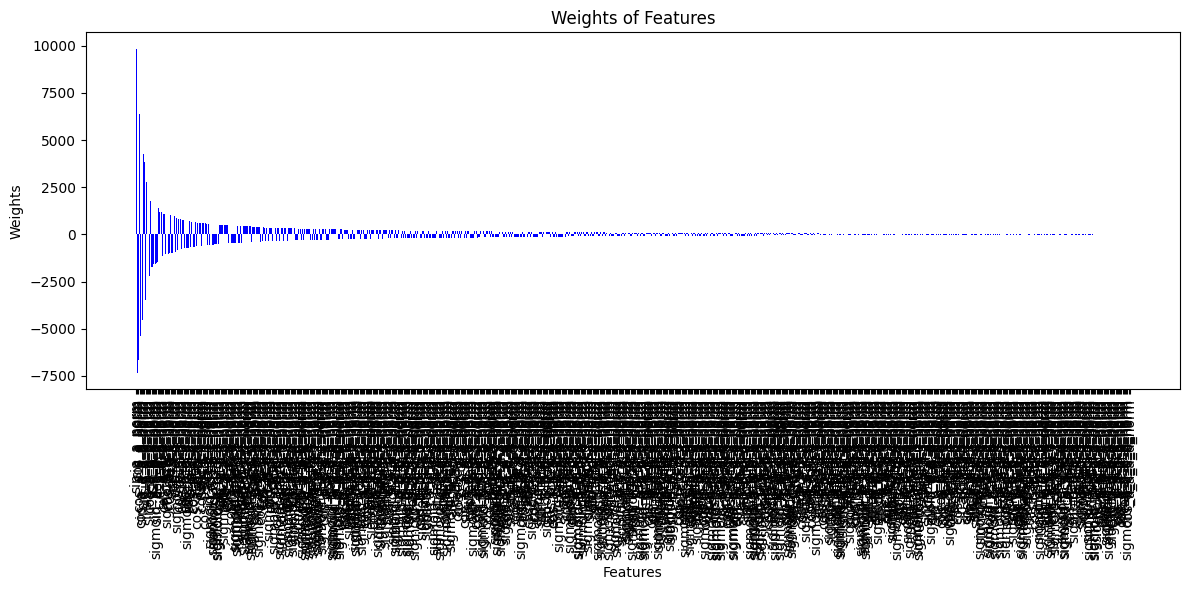

In [45]:
features_weights = plot_feature_importance(model, train_data)

In [46]:
# drop the least important features
n_features = 50
best_features = [x[0] for x in features_weights[:n_features]]
cut_data = transformed_data[best_features + ['y']]

train_data, val_data, test_data = divide_data(cut_data, 0.6, 0.2)

td_x, td_y = divide_y(train_data)
vd_x, vd_y = divide_y(val_data)
test_x, test_y = divide_y(test_data)

print(td_x.shape, td_y.shape)

model_small = LinearModel(n_features, 1, loss_f=MSE())
model_small.fit_analytical(td_x, td_y)
model_small.summary(vd_x, vd_y)

(1199, 50) (1199,)
Weights: [-4.56983177e+06 -6.60807892e+06 -1.12002035e+06  2.74814454e+06
 -4.99382301e+05  3.09301340e+05  3.54652221e+01 -5.36089501e+06
 -8.47899826e+00  1.10807942e+02  1.21374760e+02  1.41612022e+01
 -4.94780877e+01 -2.38727442e+07  2.22208038e+01  3.37844690e+02
  1.15472686e+07  1.90479181e+06 -9.73589907e+01 -1.10671498e+06
 -2.05707400e+03 -1.95047983e+02 -2.48139566e+02 -3.41345388e+05
  1.00705894e+01 -7.80648641e+01 -2.58214160e+06  2.63875125e+01
 -2.35005923e+02  2.76218968e+01 -4.29874642e+02  2.54826386e+07
 -8.31362174e+01  1.48888178e+02 -1.54597482e+01 -3.90925420e+03
 -3.16952203e+01  1.69412669e+01  2.39965522e+03 -7.73326669e+01
 -6.01126848e+01 -3.35199568e+01 -9.76277641e-01 -6.06897092e+01
 -3.95789172e+00  3.41017046e+01  1.63273089e+02 -3.91183131e+01
  1.14425493e+00  3.35371103e+01]
Loss: 17151.853221706602


Epoch 1/50000 Loss: 195393.49576508318
Epoch 1/50000 Validation Loss: 201571.86132481942
Epoch 101/50000 Loss: 106975.37501099563
Epoch 101/50000 Validation Loss: 110439.57595377992
Epoch 201/50000 Loss: 98706.77487676454
Epoch 201/50000 Validation Loss: 102049.77723911051
Epoch 301/50000 Loss: 93128.59562283717
Epoch 301/50000 Validation Loss: 96380.20862114843
Epoch 401/50000 Loss: 88888.03951600523
Epoch 401/50000 Validation Loss: 92044.11770872168
Epoch 501/50000 Loss: 85495.92077767999
Epoch 501/50000 Validation Loss: 88542.34453745528
Epoch 601/50000 Loss: 82712.2523628157
Epoch 601/50000 Validation Loss: 85635.27827130943
Epoch 701/50000 Loss: 80391.37381133948
Epoch 701/50000 Validation Loss: 83181.24712270348
Epoch 801/50000 Loss: 78433.9582777099
Epoch 801/50000 Validation Loss: 81085.6842368687
Epoch 901/50000 Loss: 76767.88493057541
Epoch 901/50000 Validation Loss: 79280.79161102534
Epoch 1001/50000 Loss: 75338.7485197971
Epoch 1001/50000 Validation Loss: 77715.62429966431


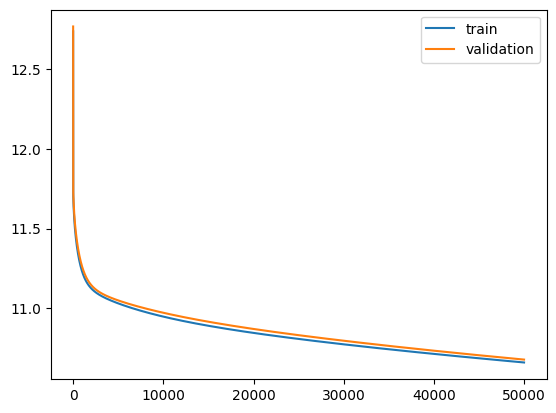

In [34]:
model2 = LinearModel(n_features, 1, loss_f=L1(MSE(), 0.00001))
loss_hist, val_lost_hist = model2.fit_gradient_descent(td_x, td_y, vd_x, vd_y,
                            lr=0.001, epochs=50000, optim=False)
model2.summary(vd_x, vd_y)

plot_loss(loss_hist, val_lost_hist)

In [ ]:
def uncor(data, column, threshold=0.9):
    # drop columns that are highly correlated with the column
    corr = data.corr()
    cols = corr.columns
    drop_cols = []
    for col in cols:
        if col == column:
            continue
        if abs(corr[column][col]) > threshold:
            drop_cols.append(col)
    print(f"dropping columns: {drop_cols}")
    return data.drop(columns=drop_cols)
    

In [ ]:
# feature generation:

poly_data = add_polynomial_features(data, 4)
norm_data = add_normalized_features(poly_data, True)

transforms = [(np.sin, 'sin'), (np.cos, 'cos'), (sigmoid, 'sigmoid'), (np.tanh, 'tanh'), (np.arctan, 'arctan')]
transformed_data = add_transform_features(norm_data, transforms)

n_features = len(transformed_data.drop(columns='y').columns)
print(f"Number of features: {n_features}")


In [ ]:
train_data, val_data, test_data = divide_data(transformed_data, 0.6, 0.2)

n_best = 50
best_cols = get_best_columns(train_data, 'y', n_best)
print(best_cols)
transformed_data = transformed_data[best_cols + ['y']]

In [ ]:
train_data, val_data, test_data = divide_data(transformed_data, 0.6, 0.2)

td_x, td_y = divide_y(train_data)
vd_x, vd_y = divide_y(val_data)
test_x, test_y = divide_y(test_data)

model3 = LinearModel(n_best, 1, loss_f=MSE())
loss_hist, val_lost_hist = model3.fit_gradient_descent(td_x, td_y, vd_x, vd_y,
                            lr=0.001, epochs=50000, optim=True, verbose=False)
# model3.fit_analytical(td_x, td_y)
model3.summary(vd_x, vd_y)

plot_loss(loss_hist, val_lost_hist)
mse = MSE().forward(model3.forward(vd_x), vd_y, model3.weights)
print(f"mse: {mse}")

In [ ]:
from itertools import product
ins = np.arange(0, 1, 0.01)
xy = product(ins, ins)
data = []
for x, y in xy:
    data.append((x, y, x*y))

plot_heatmap(data)

In [ ]:
def grid_search(alphas1, alphas2, func):
    best_alpha1 = None
    best_alpha2 = None
    best_loss = np.inf
    
    history = []
    
    for alpha1, alpha2 in product(alphas1, alphas2):
        act_loss = func(alpha1, alpha2)
        history.append((alpha1, alpha2, act_loss))
        print(f"alpha1: {alpha1}, alpha2: {alpha2}, loss: {act_loss}")
        if act_loss < best_loss:
            best_alpha1 = alpha1
            best_alpha2 = alpha2
            best_loss = act_loss
            # print(f"alpha1: {alpha1}, alpha2: {alpha2}, loss: {act_loss}")
            
    return best_alpha1, best_alpha2, best_loss, history

n_best = 30

train_data, val_data, test_data = divide_data(transformed_data, 0.6, 0.2)
n_features = len(transformed_data.drop(columns='y').columns)

td_x, td_y = divide_y(train_data)
vd_x, vd_y = divide_y(val_data)
test_x, test_y = divide_y(test_data)

def giga_func(alpha1, alpha2):
    model = LinearModel(n_features, 1, loss_f=L1(L2(MSE(), alpha1), alpha2))
    model.fit_gradient_descent(td_x, td_y, vd_x, vd_y, lr=1e-4, epochs=5000, optim=True, verbose=False)
    best_cols = get_best_columns(train_data, 'y', n_best)  
    cut_data_train = train_data[best_cols + ['y']]
    cut_data_val = val_data[best_cols + ['y']]
    ctd_x, ctd_y = divide_y(cut_data_train)
    cvd_x, cvd_y = divide_y(cut_data_val)
    
    small_model = LinearModel(n_best, 1, loss_f=MSE())
    small_model.fit_analytical(ctd_x, ctd_y)
    return small_model.evaluate(cvd_x, cvd_y)

alphas1 = np.arange(0, 0.01, 1e-3)
alphas2 = np.arange(0, 0.01, 1e-3)

# supress warnings
import warnings
warnings.filterwarnings("ignore")
best_alpha1, best_alpha2, best_loss, history = grid_search(alphas1, alphas2, giga_func)

print(f"best alpha1: {best_alpha1}, best alpha2: {best_alpha2}, best loss: {best_loss}")

plot_heatmap(history)
    

In [ ]:
def get_loss(alpha1, alpha2):
    model = LinearModel(n_features, 1, loss_f=L1(L2(MSE(), alpha1), alpha2))
    model.fit_gradient_descent(td_x, td_y, vd_x, vd_y, lr=1e-4, epochs=1000, optim=True, verbose=False)
    return MSE().forward(model.forward(vd_x), vd_y, model.weights)
    
alphas1 = np.arange(0, 0.1, 1e-2)
alphas2 = np.arange(0, 0.1, 1e-2)

best_alpha1, best_alpha2, best_loss, history = grid_search(alphas1, alphas2, get_loss)

In [ ]:
print(f"best alpha1: {best_alpha1}, best alpha2: {best_alpha2}, best loss: {best_loss}")
plot_heatmap(history)

In [ ]:
def get_loss2(alpha1, alpha2):
    model = LinearModel(n_features, 1, loss_f=L1(L2(MSE(), alpha1), alpha2))
    model.fit_gradient_descent(td_x, td_y, vd_x, vd_y, lr=1e-2, epochs=1000, optim=True, verbose=False)
    return MSE().forward(model.forward(vd_x), vd_y, model.weights)
    
alphas1 = np.arange(0, 0.1, 1e-2)
alphas2 = np.arange(0, 0.1, 1e-2)

best_alpha1, best_alpha2, best_loss, history = grid_search(alphas1, alphas2, get_loss2)

print(f"best alpha1: {best_alpha1}, best alpha2: {best_alpha2}, best loss: {best_loss}")
plot_heatmap(history)